# Used Car Pricing Prediction

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


# Data Extraction

In [2]:
dataset_x_train = pd.read_csv('../input/used-car-price-dataset-competition-format/X_train.csv')
dataset_y_train = pd.read_csv('../input/used-car-price-dataset-competition-format/y_train.csv')

In [3]:
dataset_x_train.shape

(4960, 10)

In [4]:
dataset_y_train.shape

(4960, 2)

In [5]:
dataset_x_train.head()

carID     brand      model  year transmission  mileage fuelType    tax  \
0  13207    hyundi   Santa Fe  2019    Semi-Auto     4223   Diesel  145.0   
1  17314  vauxhall        GTC  2015       Manual    47870   Diesel  125.0   
2  12342      audi        RS4  2019    Automatic     5151   Petrol  145.0   
3  13426        vw   Scirocco  2016    Automatic    20423   Diesel   30.0   
4  16004     skoda      Scala  2020    Semi-Auto     3569   Petrol  145.0   

    mpg  engineSize  
0  39.8         2.2  
1  60.1         2.0  
2  29.1         2.9  
3  57.6         2.0  
4  47.1         1.0

In [6]:
dataset_y_train.head()

carID  price
0  13207  31995
1  17314   7700
2  12342  58990
3  13426  12999
4  16004  16990

In [7]:
#union of data
join = (dataset_x_train, dataset_y_train['price'])
df = pd.concat(join, axis = True)
df.head()

carID     brand      model  year transmission  mileage fuelType    tax  \
0  13207    hyundi   Santa Fe  2019    Semi-Auto     4223   Diesel  145.0   
1  17314  vauxhall        GTC  2015       Manual    47870   Diesel  125.0   
2  12342      audi        RS4  2019    Automatic     5151   Petrol  145.0   
3  13426        vw   Scirocco  2016    Automatic    20423   Diesel   30.0   
4  16004     skoda      Scala  2020    Semi-Auto     3569   Petrol  145.0   

    mpg  engineSize  price  
0  39.8         2.2  31995  
1  60.1         2.0   7700  
2  29.1         2.9  58990  
3  57.6         2.0  12999  
4  47.1         1.0  16990

In [8]:
#indexing car ID
df = df.set_index('carID')
df.head()

brand      model  year transmission  mileage fuelType    tax   mpg  \
carID                                                                          
13207    hyundi   Santa Fe  2019    Semi-Auto     4223   Diesel  145.0  39.8   
17314  vauxhall        GTC  2015       Manual    47870   Diesel  125.0  60.1   
12342      audi        RS4  2019    Automatic     5151   Petrol  145.0  29.1   
13426        vw   Scirocco  2016    Automatic    20423   Diesel   30.0  57.6   
16004     skoda      Scala  2020    Semi-Auto     3569   Petrol  145.0  47.1   

       engineSize  price  
carID                     
13207         2.2  31995  
17314         2.0   7700  
12342         2.9  58990  
13426         2.0  12999  
16004         1.0  16990

In [9]:
df.describe()

year        mileage          tax          mpg   engineSize  \
count  4960.000000    4960.000000  4960.000000  4960.000000  4960.000000   
mean   2016.737903   24956.286895   152.332661    50.370766     2.124375   
std       2.884035   24443.333662    82.403844    35.746505     0.789368   
min    1997.000000       1.000000     0.000000     2.800000     0.000000   
25%    2016.000000    5641.250000   145.000000    38.700000     1.600000   
50%    2017.000000   19000.000000   145.000000    47.100000     2.000000   
75%    2019.000000   36702.000000   150.000000    54.300000     2.800000   
max    2020.000000  259000.000000   580.000000   470.800000     6.600000   

               price  
count    4960.000000  
mean    23469.943750  
std     16406.714563  
min       450.000000  
25%     12000.000000  
50%     18999.000000  
75%     30335.750000  
max    145000.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 13207 to 15135
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4960 non-null   object 
 1   model         4960 non-null   object 
 2   year          4960 non-null   int64  
 3   transmission  4960 non-null   object 
 4   mileage       4960 non-null   int64  
 5   fuelType      4960 non-null   object 
 6   tax           4960 non-null   float64
 7   mpg           4960 non-null   float64
 8   engineSize    4960 non-null   float64
 9   price         4960 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 426.2+ KB


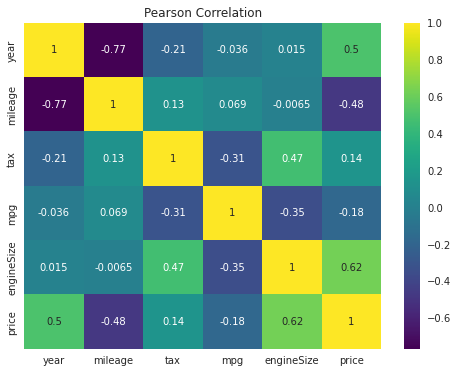

In [11]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

# Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


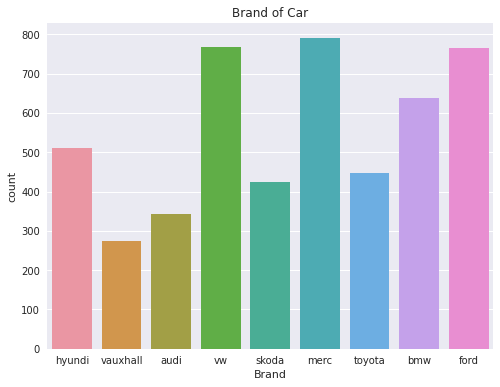

In [12]:
#visualize brand of car
plt.figure(figsize = (8,6))
sns.countplot(df['brand'])
plt.title("Brand of Car")
plt.xlabel("Brand")
plt.show()

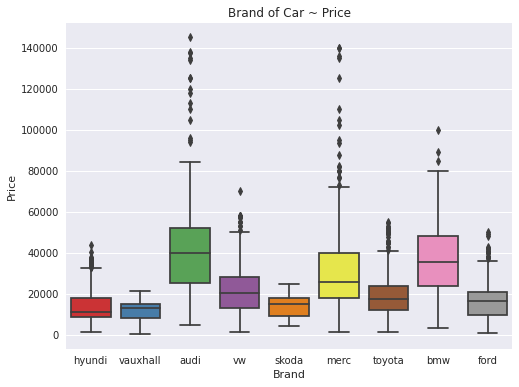

In [13]:
#visualize brand of car ~ price
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'brand', y = 'price', palette = 'Set1')
plt.title("Brand of Car ~ Price")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


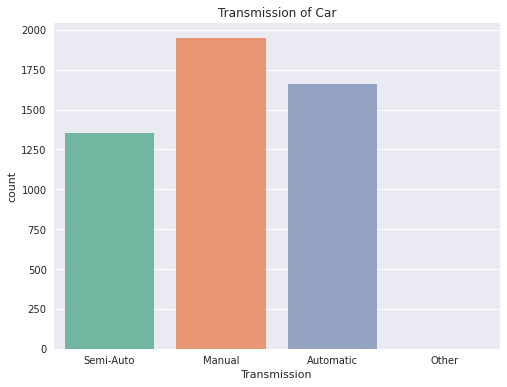

In [14]:
#visualize transmission of car
plt.figure(figsize = (8,6))
sns.countplot(df['transmission'], palette = 'Set2')
plt.title("Transmission of Car")
plt.xlabel("Transmission")
plt.show()

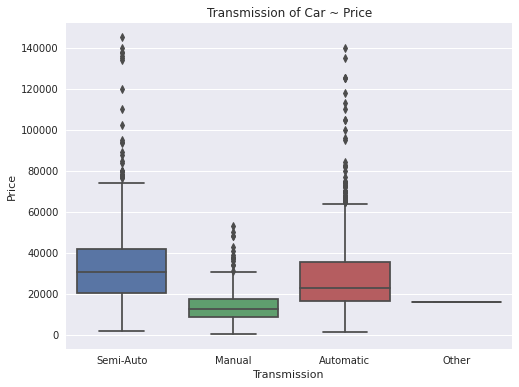

In [15]:
#visualize transmission of car ~ price
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'transmission', y = 'price')
plt.title("Transmission of Car ~ Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


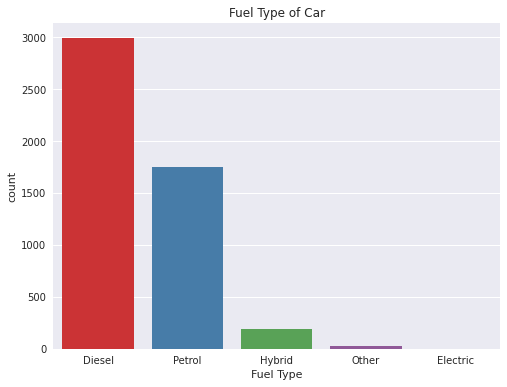

In [16]:
#visualize fuel type of car
plt.figure(figsize = (8,6))
sns.countplot(df['fuelType'], palette = 'Set1')
plt.title("Fuel Type of Car")
plt.xlabel("Fuel Type")
plt.show()

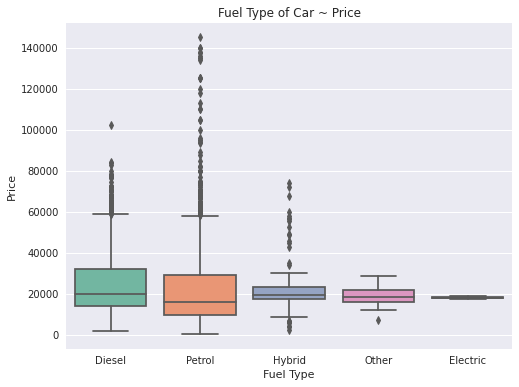

In [17]:
#visualize fuel type of car ~ price
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'fuelType', y = 'price', palette = 'Set2')
plt.title("Fuel Type of Car ~ Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

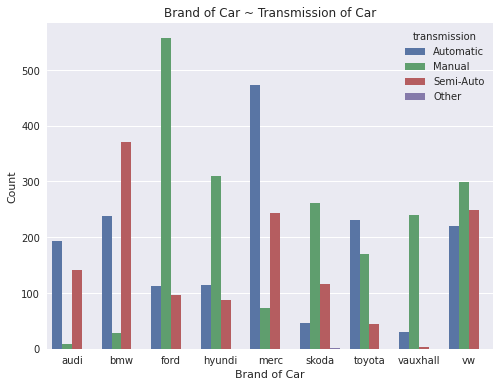

In [18]:
#group brand of car & transmission
brand_transmission = df.groupby(['brand', 'transmission']).size().reset_index(name = 'Count')

#visualize brand of car & transmission
plt.figure(figsize = (8,6))
sns.barplot(data = brand_transmission, x = 'brand', y = 'Count', hue = 'transmission')
plt.title("Brand of Car ~ Transmission of Car")
plt.xlabel("Brand of Car")
plt.show()

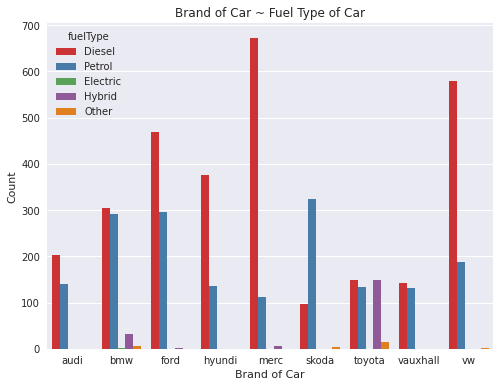

In [19]:
#group brand of car & fuel type
brand_fuel= df.groupby(['brand', 'fuelType']).size().reset_index(name = 'Count')

#visualize brand of car & fuel type
plt.figure(figsize = (8,6))
sns.barplot(data = brand_fuel, x = 'brand', y = 'Count', hue = 'fuelType', palette = 'Set1')
plt.title("Brand of Car ~ Fuel Type of Car")
plt.xlabel("Brand of Car")
plt.show()

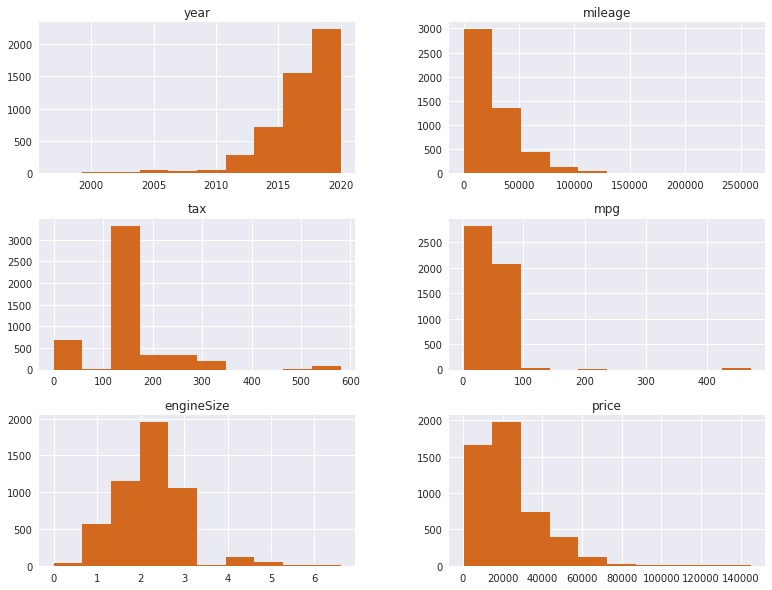

In [20]:
#visualize histogram of each attribute
df.hist(figsize = (13,10), color = 'chocolate')
plt.show()

# Linear Regression Model

In [21]:
#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

year  mileage    tax   mpg  engineSize  price  brand_bmw  brand_ford  \
carID                                                                         
13207  2019     4223  145.0  39.8         2.2  31995          0           0   
17314  2015    47870  125.0  60.1         2.0   7700          0           0   
12342  2019     5151  145.0  29.1         2.9  58990          0           0   
13426  2016    20423   30.0  57.6         2.0  12999          0           0   
16004  2020     3569  145.0  47.1         1.0  16990          0           0   

       brand_hyundi  brand_merc  ...  model_ Zafira Tourer  model_ i3  \
carID                            ...                                    
13207             1           0  ...                     0          0   
17314             0           0  ...                     0          0   
12342             0           0  ...                     0          0   
13426             0           0  ...                     0          0   
16004             0           0  ...                     0          0   

       model_ i8  transmission_Manual  transmission_Other  \
carID                                                       
13207          0                    0                   0   
17314          0                    1                   0   
12342          0                    0                   0   
13426          0                    0                   0   
16004          0                    0                   0   

       transmission_Semi-Auto  fuelType_Electric  fuelType_Hybrid  \
carID                                                               
13207                       1                  0                0   
17314                       0                  0                0   
12342                       0                  0                0   
13426                       0                  0                0   
16004                       1                  0                0   

       fuelType_Other  fuelType_Petrol  
carID                                   
13207               0                0  
17314               0                0  
12342               0                1  
13426               0                0  
16004               0                1  

[5 rows x 110 columns]

In [22]:
#split data 
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3472, 109)
(3472,)
(1488, 109)
(1488,)


In [23]:
#build model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 53.5 ms, sys: 26.4 ms, total: 79.8 ms
Wall time: 43.7 ms


0.8825425781405734

In [24]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[26268.20317806 25289.1861617  68384.53941609 ...  7104.97508877
  4201.42033153 -1784.47432429]


In [25]:
#check MAE, MSE & RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  3554.84
Mean Squared Error :  32717909.36
Root Mean Squared Error :  59.622478982343566


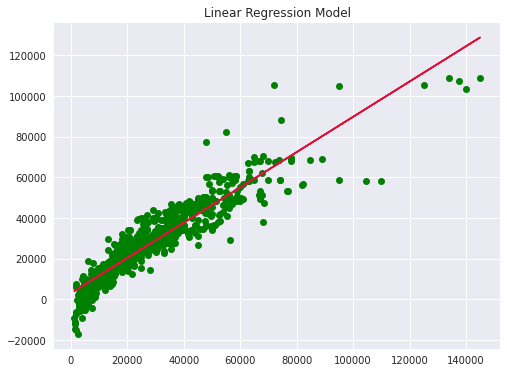

In [26]:
#visualize model
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o', color = 'g')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'crimson')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


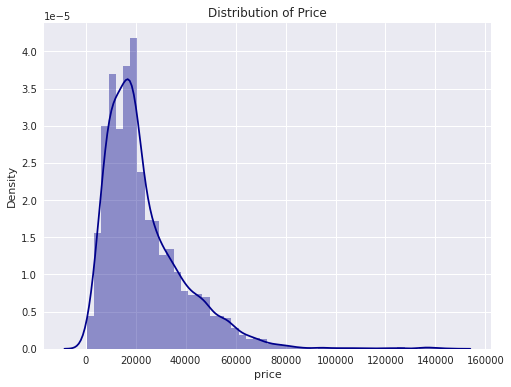

In [27]:
#distribution
plt.figure(figsize = (8,6))
sns.distplot(df['price'], color = 'darkblue')
plt.title("Distribution of Price")
plt.show()

Text(0.5, 0, 'log10(Price)')

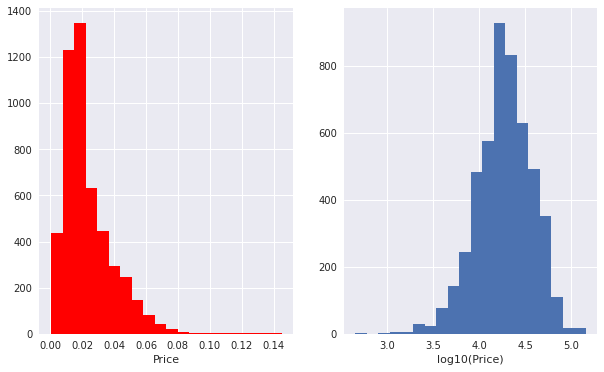

In [28]:
#transform distribution to normal distribution
figure(figsize = (10,6))
subplot(1,2,1)
hist(df['price'] * 1e-6, 20, color = 'r');
xlabel("Price")
subplot(1, 2, 2)
hist(log10(df['price']), 20);
xlabel("log10(Price)")

# Check Feature Importance

In [29]:
#defining feature
coef = pd.Series(lr.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

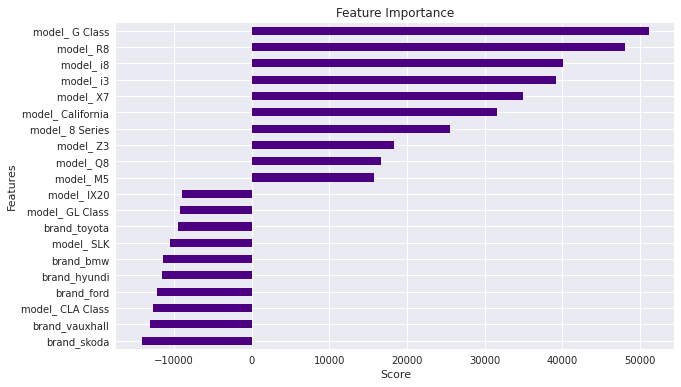

In [30]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh', color = 'indigo')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()